In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA

df = pd.read_csv('diabetes.csv')
print(df.head())
#df.shape 768 Rows, 9 Columns

X, y = df.iloc[:,:-1], df.iloc[:, -1]

X_normalized = MinMaxScaler().fit_transform(X)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
class SimplePCA (BaseEstimator, TransformerMixin):
    def __init__(self, ndims):
        """ ndims: how many dimensions to reduce data to"""
        self.ndims = ndims
    
    def fit(self, X): # no labels
        self.mu = np.mean(X, axis=0)
        
        # Center the data
        X = X - self.mu
        
        # Compute the covariance matrix
        cov = np.cov(X.T)
        
        # Compute the eigenvectors and eigenvalues of cov
        eig_vals, eig_vecs = np.linalg.eig(cov)

        # Sort eigenvectors by decreasing eigenvalues
        eig_vecs = eig_vecs.T
        sortedIndices = np.argsort(eig_vals)[::-1]
        self.eig_vals = eig_vals[sortedIndices]
        self.eig_vecs = eig_vecs[sortedIndices]
        self.explained_variance_ratio_ = [i / self.eig_vals.sum() for i in self.eig_vals if i / self.eig_vals.sum() >= 0.001]
        
        return self
    
    def transform(self, X_unseen):
        # Center the data
        X = X_unseen - self.mu
        # project the data and returing the results
        return np.dot(X, self.eig_vecs[0:self.ndims].T)

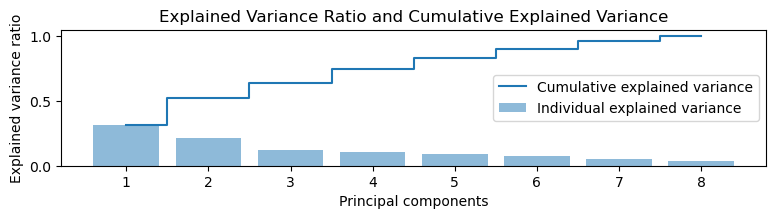

Number of components to explain 95% of the variance: 7


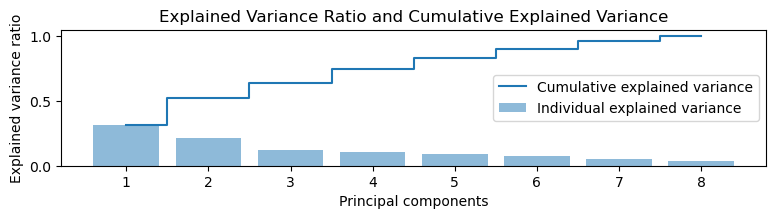

Number of components to explain 95% of the variance: 7


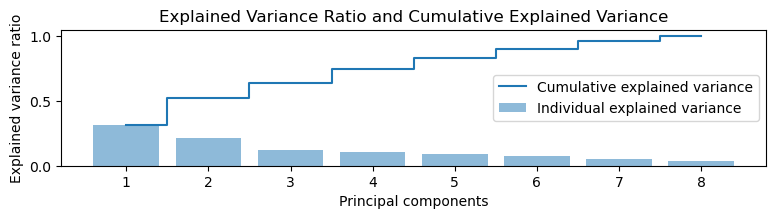

Number of components to explain 95% of the variance: 7


In [3]:
scratch_pca = SimplePCA(7).fit(X_normalized)
pca_raw = PCA(n_components=7).fit(X)
pca_normalized = PCA(n_components=7).fit(X_normalized)

for i, pca in [(1, scratch_pca), (3, pca_normalized), (5, pca_raw)]:

    explained_variance_ratio = scratch_pca.explained_variance_ratio_
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)

    # Plot explained variance ratio
    plt.figure(figsize=(20, 6))
    plt.subplot(3, 2, i)
    plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.title('Explained Variance Ratio and Cumulative Explained Variance')
    plt.show()

    # Determine the number of components to explain 95% of the variance
    n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
    print(f'Number of components to explain 95% of the variance: {n_components}')

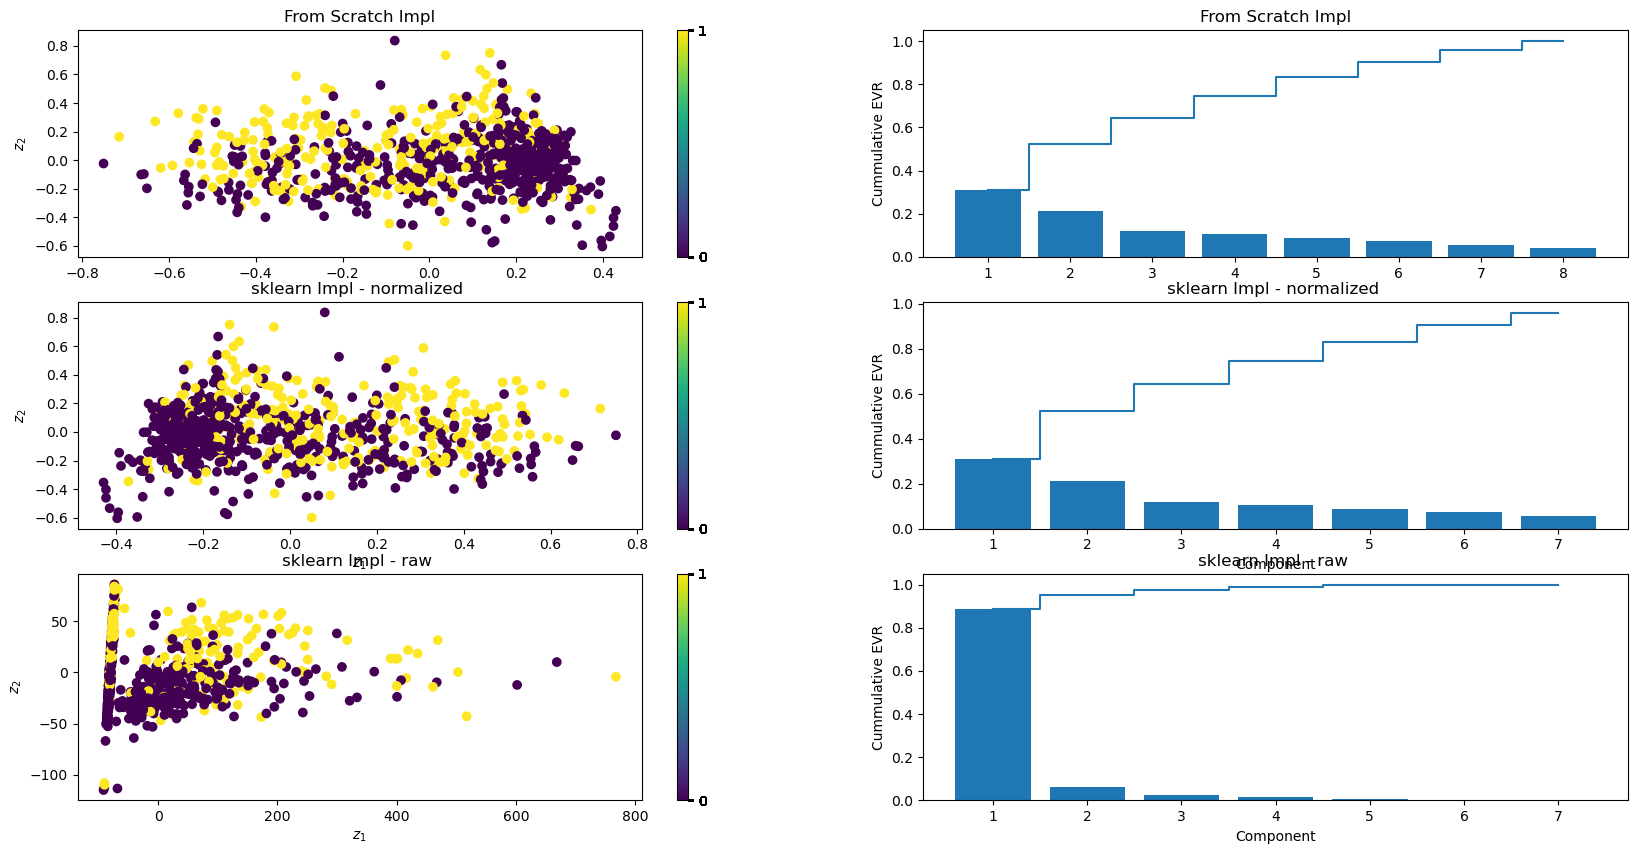

In [ ]:
fig = plt.figure(figsize=(20, 10))

for i, pca, title in [(1, scratch_pca, "Custon"), 
                      (3, pca_normalized, "sklearn normalized "), 
                      (5, pca_raw, "sklearn raw ")]:
    X_projected = pca.transform(X_normalized if i < 5 else X)

    plt.subplot(3, 2, i)
    plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y)
    cb = plt.colorbar()
    cb.set_ticks(y)
    if i != 1: plt.xlabel('$z_1$')
    plt.ylabel('$z_2$')
    plt.title(title)

    expl_var = pca.explained_variance_ratio_
    cum_expl_var = np.cumsum(expl_var)

    plt.subplot(3, 2, i + 1)
    plt.bar(range(1, len(expl_var) + 1), expl_var, align='center')
    plt.ylabel('EVR')
    if i != 1: plt.xlabel('Component')

    plt.step(range(1, len(cum_expl_var) + 1), cum_expl_var, where='mid')
    plt.ylabel("Cummulative EVR")
    if i != 1: plt.xlabel('Component')
    plt.title(title)

In [5]:
eigen_vals, eigen_vecs = np.linalg.eig(np.cov(X_normalized.T))
loadings = eigen_vecs * np.sqrt(eigen_vals)

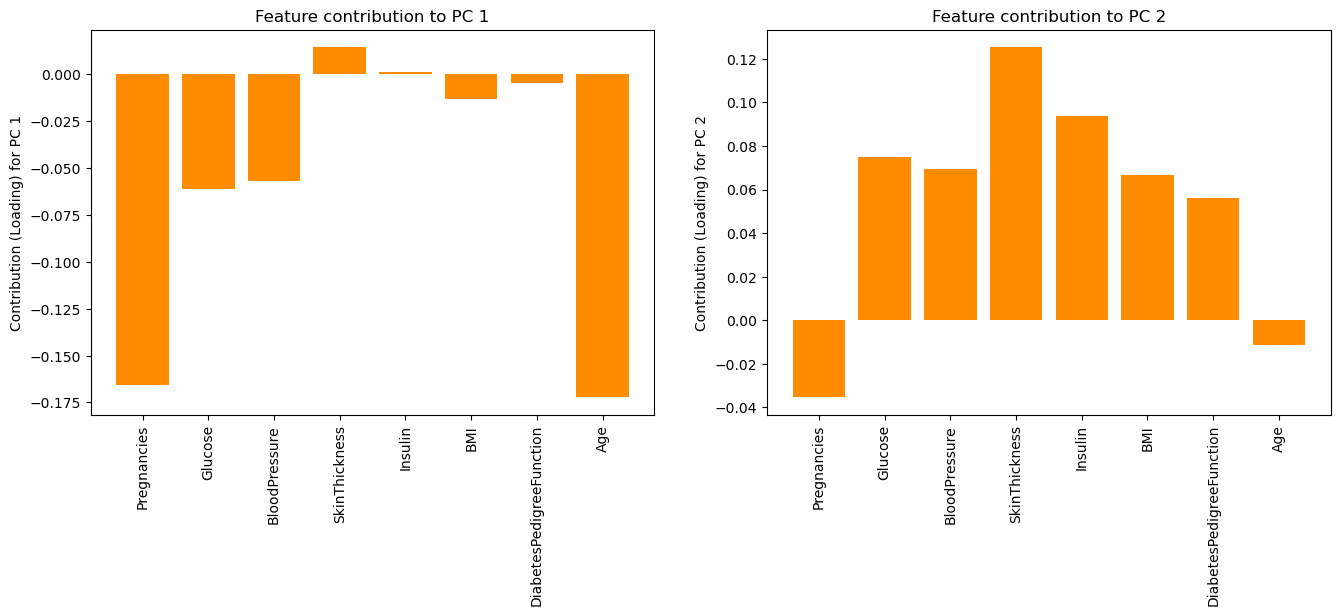

In [6]:
fig = plt.figure(figsize=(16, 5))

for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.bar(range(X_normalized.shape[1]), loadings[:, i], align='center', color="darkorange")
    plt.ylabel(f"Contribution (Loading) for PC {i + 1}")
    plt.xticks(range(8), labels=df.columns[:-1], rotation=90)
    plt.title(f"Feature contribution to PC {i + 1}")